In [1]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
base_dir = '/Users/anasarodake/DataSpell/UnI-ML-DL/video_Ki/images'
classes = ['smile' , 'neutral']

In [3]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
IMG_SHAPE = 250

batch_size =50

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    #zoom_range=0.5,
    horizontal_flip=True,
    #width_shift_range=0.15,
    #height_shift_range=0.15
)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode='sparse',
    classes=classes
)

Found 1375 images belonging to 2 classes.


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
#dieser ablock sucht nach Bildern, die evtl. einen Fehler bei ber Implimentierung verursachen und zeigt sie auf
import PIL
from pathlib import Path
path = Path(train_dir).rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [7]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen.flow_from_directory(
    directory=val_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')

Found 230 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


test_data_gen =  image_gen.flow_from_directory(
    directory=test_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')




Found 687 images belonging to 2 classes.


In [9]:
model = Sequential()


model.add(Conv2D(4,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Conv2D(32, 3 ,padding='same' , activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))






model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.4))

#
model.add(Dense(512 ,  activation='relu'))


model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

Metal device set to: Apple M1


2022-04-19 21:51:42.141912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 21:51:42.142163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [11]:
#from tensorflow.python.keras.callbacks import EarlyStopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience= 3 , verbose=1)

epochs = 20
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), #alle Bilder / 10
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    #callbacks=[callback]
)

Epoch 1/20


2022-04-19 21:51:42.760585: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-04-19 21:51:43.001680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 1.6222 - accuracy: 0.5193

2022-04-19 21:51:55.626347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 13s 462ms/step - loss: 1.6222 - accuracy: 0.5193 - val_loss: 0.6894 - val_accuracy: 0.5130
Epoch 2/20
28/28 [==============================] - 12s 438ms/step - loss: 0.6882 - accuracy: 0.5353 - val_loss: 0.6912 - val_accuracy: 0.5130
Epoch 3/20
28/28 [==============================] - 12s 439ms/step - loss: 0.6694 - accuracy: 0.6007 - val_loss: 0.6363 - val_accuracy: 0.5783
Epoch 4/20
28/28 [==============================] - 12s 438ms/step - loss: 0.5926 - accuracy: 0.6945 - val_loss: 0.5443 - val_accuracy: 0.7261
Epoch 5/20
28/28 [==============================] - 12s 434ms/step - loss: 0.4910 - accuracy: 0.7767 - val_loss: 0.4038 - val_accuracy: 0.8217
Epoch 6/20
28/28 [==============================] - 12s 434ms/step - loss: 0.3687 - accuracy: 0.8487 - val_loss: 0.2967 - val_accuracy: 0.8739
Epoch 7/20
28/28 [==============================] - 12s 429ms/step - loss: 0.3182 - accuracy: 0.8727 - val_loss: 0.2677 - val_accuracy: 0.8870
Epoch 8/20

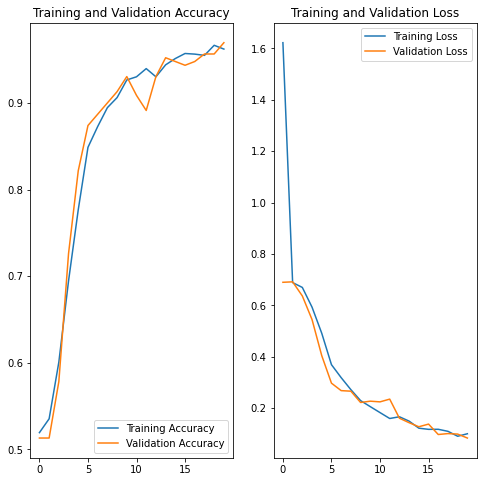

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
evaluated = model.evaluate(
    x = test_data_gen)

14/14 [==============================] - 2s 134ms/step - loss: 0.0421 - accuracy: 0.9811


In [44]:
predict_dir_smile = os.path.join(base_dir, 'test/smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir_smile,
    classes = classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 354,
    class_mode= 'sparse'
)



predicted_smile = model.predict(x = predict_smile_data_gen)



for value in predicted_smile:
    print("\nLächeln Bild, die KI Werte:    lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ) , "   richtig geschätzt:  " ,  (value[0] > value[1]) )

Found 354 images belonging to 2 classes.

Lächeln Bild, die KI Werte:    lachen:99.91      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:93.51      Neutral:6    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.77      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:97.86      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:98.1      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:96.1      Neutral:4    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:94.94      Neutral:5    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.91      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.91      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.99      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.72      Neutral:0    richtig 

In [45]:
index = 0
false_images = np.array([])
for value in predicted_smile:
    if value[0] < value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1



falsch geschätztes BILD:    lachen: 13.1      Neutral: 87        Bild_Index: 21
falsch geschätztes BILD:    lachen: 35.12      Neutral: 65        Bild_Index: 133
falsch geschätztes BILD:    lachen: 35.31      Neutral: 65        Bild_Index: 284
falsch geschätztes BILD:    lachen: 22.56      Neutral: 77        Bild_Index: 352


In [46]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images), " von : ", len (predicted_smile))
evaluated = model.evaluate(
    x = predict_smile_data_gen)

zahl der Falsch geschätzten Bilder:  4  von :  354
1/1 [==============================] - 1s 1s/step - loss: 0.0316 - accuracy: 0.9887


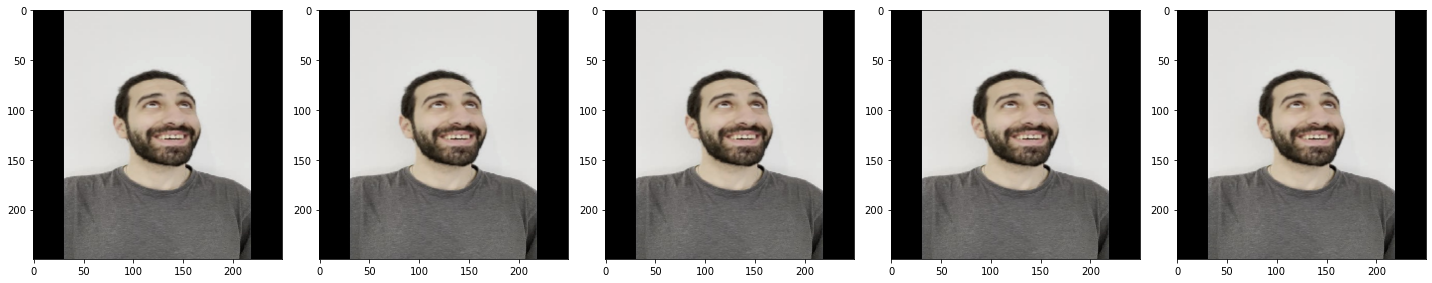

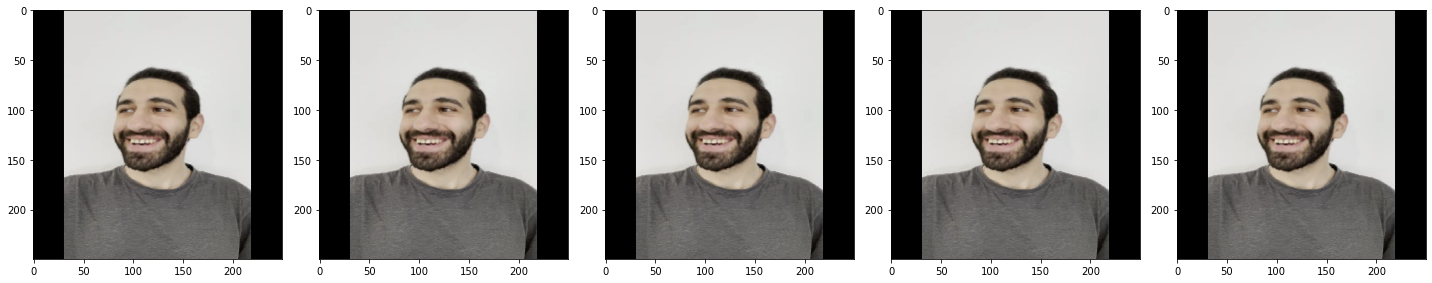

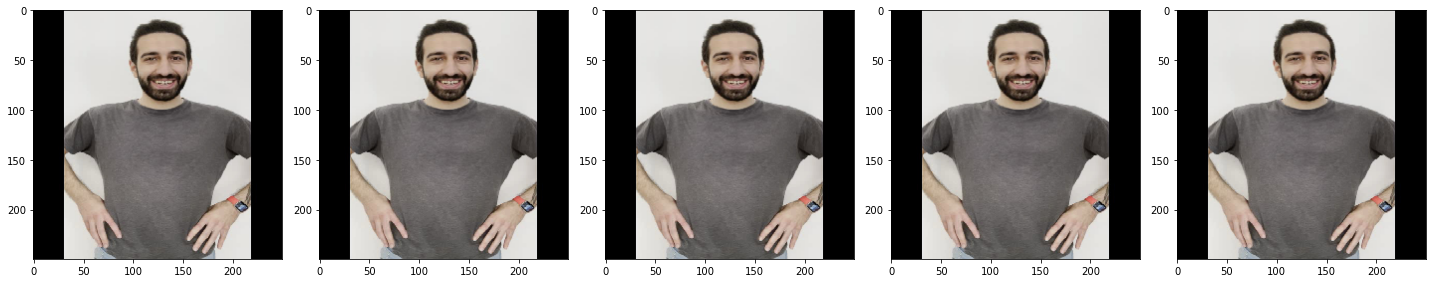

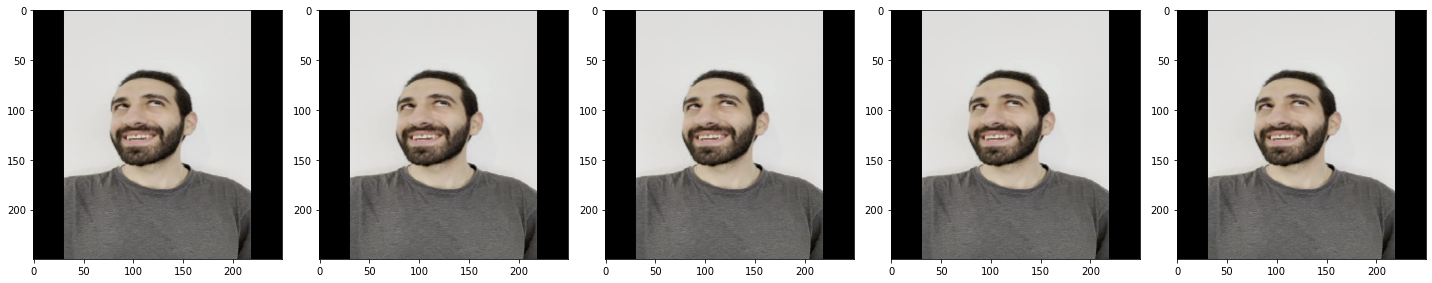

In [26]:
for pic in false_images:
    augmented_images = [predict_smile_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

In [27]:
predict_dir = os.path.join(base_dir, 'test/neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 333,
    class_mode= 'sparse')



predicted = model.predict(x = predict_neutral_data_gen)
for value in predicted:
    print("Neutrales Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))

Found 333 images belonging to 1 classes.
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.13      Neutral:100
Neutrales Bild, die KI Werte:   lachen:42.44      Neutral:58
Neutrales Bild, die KI Werte:   lachen:6.84      Neutral:93
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.01      Neutral:100
Neutrales Bild, die KI Werte:   lachen:53.41      Neutral:47
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:1.63      Neutral:98
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.04      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.01      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.03      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:3.8      Neutral:96
Neutrales Bild, die KI Werte:   lachen:0.01      Neut

In [28]:
index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1

falsch geschätztes BILD:    lachen: 53.41      Neutral: 47        Bild_Index: 6
falsch geschätztes BILD:    lachen: 84.04      Neutral: 16        Bild_Index: 44
falsch geschätztes BILD:    lachen: 57.52      Neutral: 42        Bild_Index: 91
falsch geschätztes BILD:    lachen: 62.75      Neutral: 37        Bild_Index: 120
falsch geschätztes BILD:    lachen: 73.21      Neutral: 27        Bild_Index: 214
falsch geschätztes BILD:    lachen: 81.42      Neutral: 19        Bild_Index: 217
falsch geschätztes BILD:    lachen: 58.79      Neutral: 41        Bild_Index: 220
falsch geschätztes BILD:    lachen: 85.38      Neutral: 15        Bild_Index: 287
falsch geschätztes BILD:    lachen: 60.14      Neutral: 40        Bild_Index: 314


In [29]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images) , " von : ", len (predicted))

zahl der Falsch geschätzten Bilder:  9  von :  333


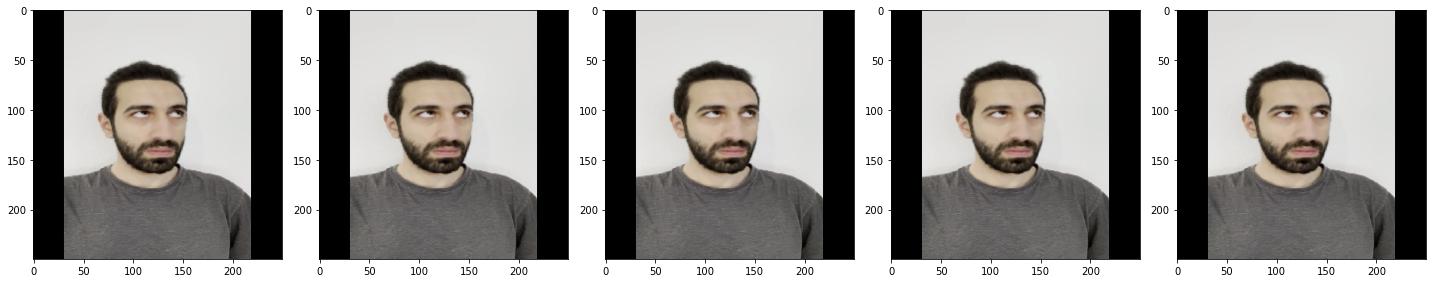

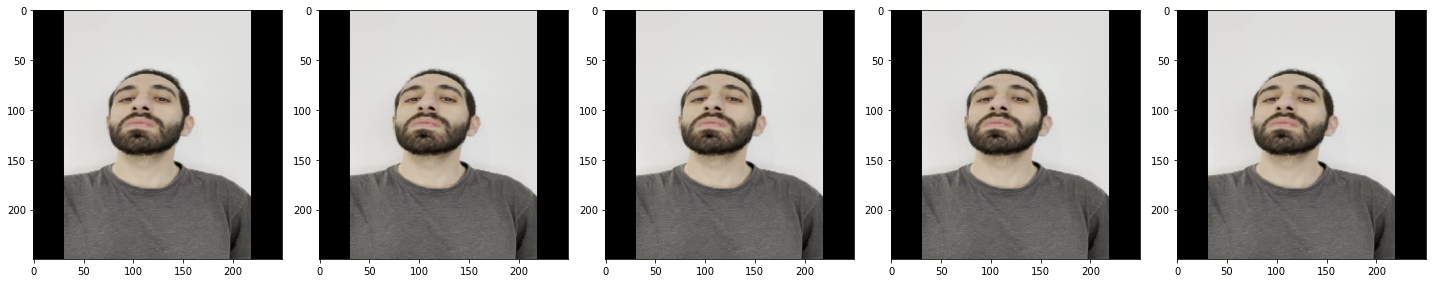

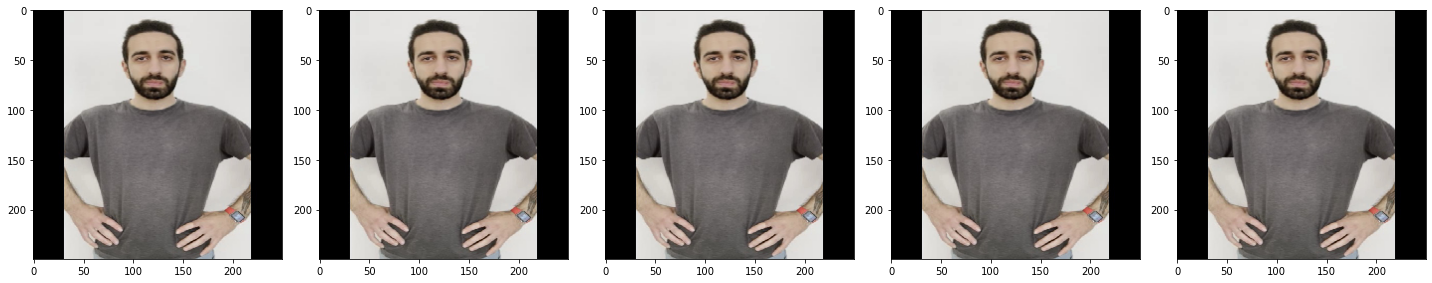

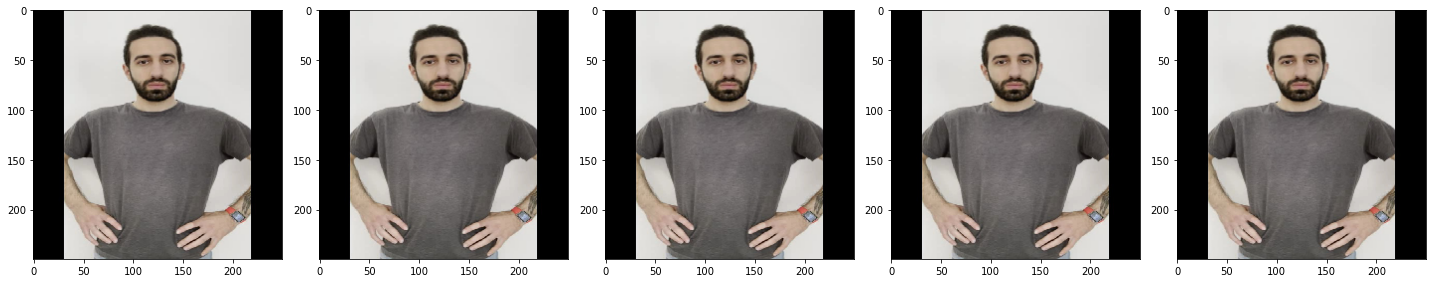

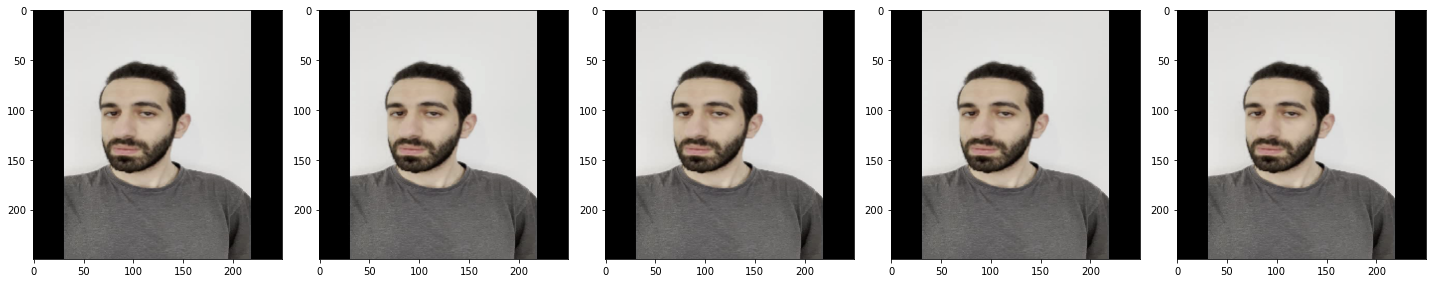

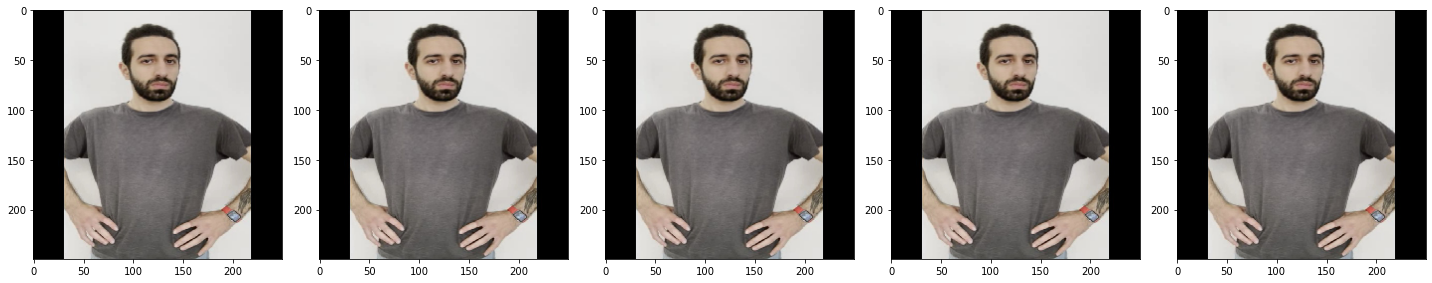

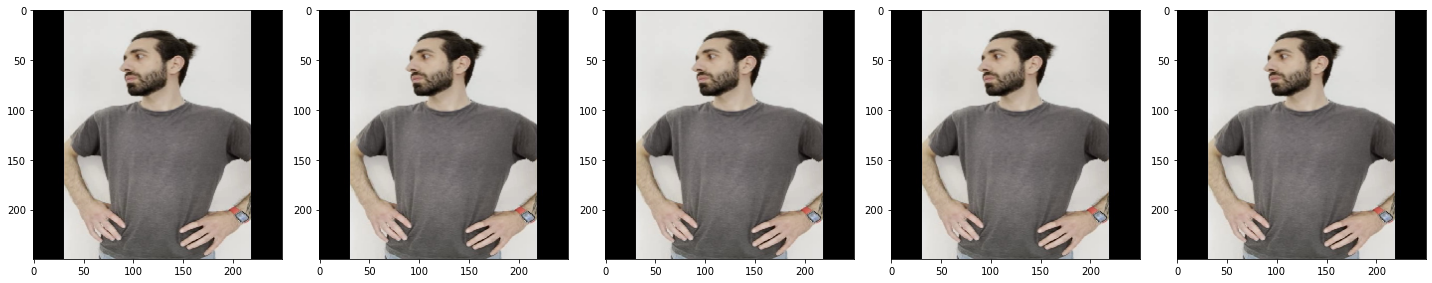

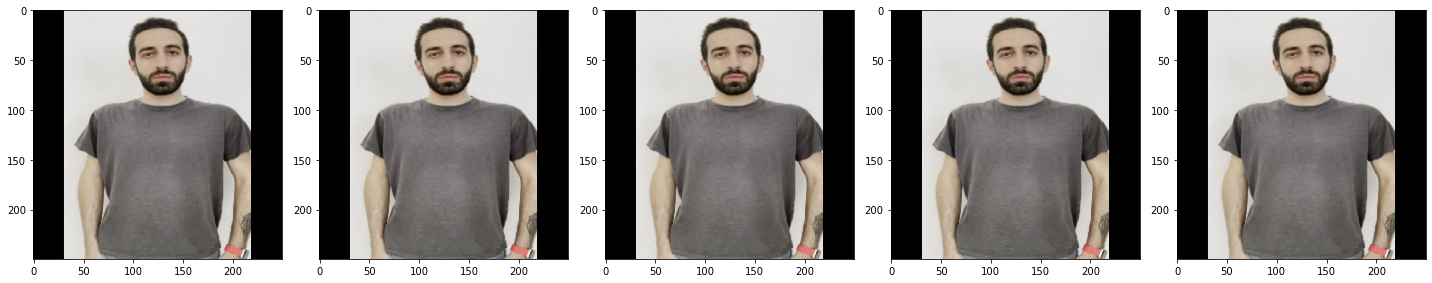

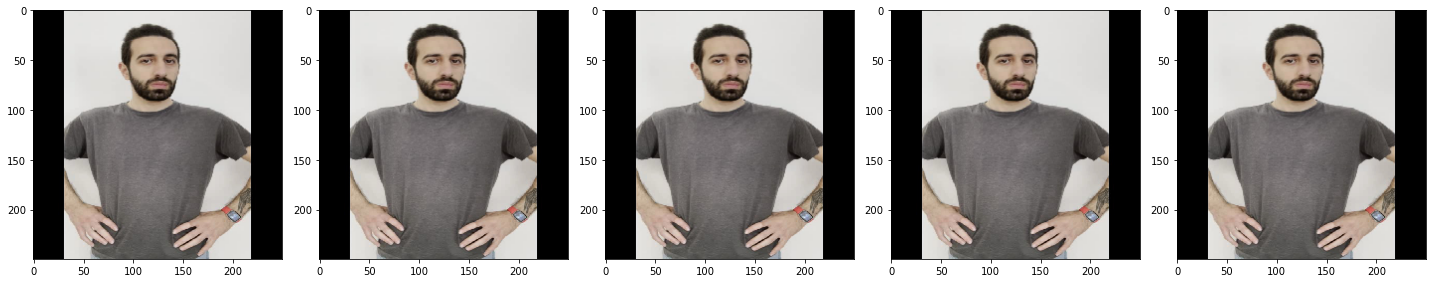

In [30]:
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)